In [0]:
import keras
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import h5py

In [0]:
import os
os.environ['KERAS_BACKEND'] = 'theano'
import keras as ks

In [0]:
#loading  data
(X_train,y_train),(X_test,y_test)=cifar10.load_data()


In [0]:
#printing shape of train and test data
print('Training data: {}'.format(X_train.shape))
print('Test data: {}'.format(y_test.shape))

Training data: (50000, 32, 32, 3)
Test data: (10000, 1)


In [0]:
#printing shape of single image
print('Single image shape: {}'.format(X_train[0].shape))

Single image shape: (32, 32, 3)


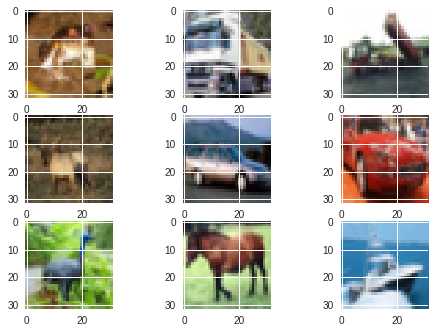

In [0]:
#creating grid of 5*5 images
for i in range(0,9):
  plt.subplot(330+1+i)
  img=X_train[i]
  plt.imshow(img)

  
  
#showing the plot
plt.show()

In [0]:
#preprocessing the data
seed=6
np.random.seed(seed)


#loading the dat again
(X_train,y_train),(X_test,y_test)=cifar10.load_data()



#normalize the input in the range 0-1
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')


X_train=X_train/255.0
X_test=X_test/255.0

In [0]:
#checking output shape and label for converting to one hot encoding
print(y_train.shape)
print(y_train[10])

(50000, 1)
[4]


In [0]:
#converting outputs in onehot encoded format
Y_train=np_utils.to_categorical(y_train)
Y_test=np_utils.to_categorical(y_test)
num_class=Y_test.shape[1]

print('no. of classes={}'.format(num_class))
print(Y_train.shape)
print(Y_train[0])

no. of classes=10
(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
#impoting necesaary libraries for building cnn model
from keras.models import Sequential
from keras.layers import Dropout,Activation,Conv2D,GlobalAveragePooling2D
from keras.optimizers import SGD 

This object recognition model is with respect to research paper 'Striving for Simplicity: The All Convolutional Net'

In [0]:
def allcnn(weights=None):
  
  
  #defining model type
  model=Sequential()
  
  #adding modle layers
  model.add(Conv2D(96,(3,3),padding='same',input_shape=(32,32,3)))
  model.add(Activation('relu'))
  
  model.add(Conv2D(96,(3,3),padding='same'))
  model.add(Activation('relu'))
  
  model.add(Conv2D(96,(3,3),padding='same',strides=(2,2)))
  model.add(Dropout(0.5))
  
  model.add(Conv2D(192,(3,3),padding='same'))
  model.add(Activation('relu'))
  
  model.add(Conv2D(192,(3,3),padding='same'))
  model.add(Activation('relu'))
  
  model.add(Conv2D(192,(3,3),padding='same',strides=(2,2)))
  model.add(Dropout(0.5))
  
  model.add(Conv2D(192,(3,3),padding='same'))
  model.add(Activation('relu'))
  
  model.add(Conv2D(192,(1,1),padding='valid'))
  model.add(Activation('relu'))
  
  model.add(Conv2D(10,(1,1),padding='valid'))
  model.add(Activation('relu'))
  
  
  
  #adding global average pooling layer with softmax as activation
  model.add(GlobalAveragePooling2D())
  model.add(Activation('softmax'))
  
  
  
  #loading the weights 
  if weights:
    model.load_weights(weights)
    
    
  #returning the model
  return model
  

In [0]:
#uploading files from system
from google.colab import files
pretrained_weights=files.upload()

Saving all_cnn_weights_0.9088_0.4994.hdf5 to all_cnn_weights_0.9088_0.4994.hdf5


In [52]:
#defining hyperparaeters
learning_rate=0.01
weight_decay=1e-6
momentum=0.9


#building model
weights='all_cnn_weights_0.9088_0.4994.hdf5'
model=allcnn(weights)


#define optimizer and compile model
sgd=SGD(lr=learning_rate,decay=weight_decay,momentum=momentum,nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])


#printing model summary
print(model.summary())



#testing the model with pre trained weights
scores=model.evaluate(X_test,Y_test,verbose=1)
print('Accuracy: {}'.format(scores[1]))






_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_57 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_58 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_15 (Dropout)         (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 16, 16, 192)       166080    
__________

In [53]:
#making dictionary of labels
classes=range(0,10)

names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


#making decitionay
class_labels=dict(zip(classes,names))

print(class_labels)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [64]:
#generating batch of images
batch=X_train[100:109]
labels=np.argmax(Y_train[100:109],axis=-1)

#make prediction
predictions=model.predict(batch,verbose=1)

9/9 [==============================] - 0s 12ms/step


In [65]:
#printing predictions they will be in form of different probabilities of classes
predictions

array([[2.09497593e-04, 4.26425431e-05, 4.25175967e-04, 5.48399461e-04,
        2.39346082e-05, 2.74446957e-05, 1.92810476e-05, 2.58277269e-05,
        9.98654485e-01, 2.32930997e-05],
       [2.17975624e-10, 2.87967458e-12, 8.35178525e-07, 9.99997497e-01,
        5.93664273e-09, 1.53882627e-06, 5.51876600e-11, 7.57864527e-08,
        6.15219941e-12, 3.46467755e-12],
       [3.20587418e-10, 7.12507608e-06, 8.87230220e-11, 7.14711797e-12,
        1.89375794e-12, 7.87999527e-12, 5.82190615e-11, 3.55409979e-10,
        1.16126294e-07, 9.99992728e-01],
       [1.65041657e-12, 4.23604263e-09, 8.24633601e-13, 9.87609716e-11,
        1.40846492e-12, 6.83630652e-10, 1.00000000e+00, 5.14181926e-12,
        1.21001251e-10, 3.07768944e-09],
       [8.48143631e-20, 8.17938743e-20, 1.47992176e-18, 6.45376757e-19,
        3.68651933e-17, 2.49824117e-18, 1.00000000e+00, 7.72705438e-22,
        5.66296814e-22, 1.26843018e-18],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
   

In [66]:
#converting class probabilities into class labels
predicted_result=np.argmax(predictions,axis=-1)
print(predicted_result)

[8 3 9 6 6 1 8 5 2]


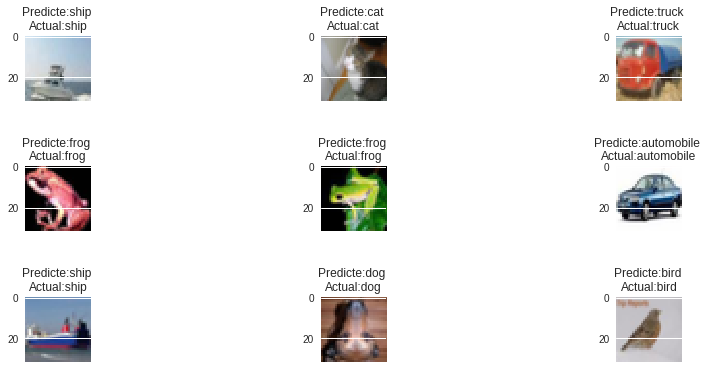

In [67]:
#creating greed of 3*3 images
fig,axs=plt.subplots(3,3,figsize=(15,6))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()



for i,img in enumerate(batch):
  for key,value in class_labels.items():
    if(predicted_result[i]==key):
      title='Predicte:{} \nActual:{}'.format(class_labels[key],class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(True)
  axs[i].imshow(img)

  
plt.show()
      
      
      